## Least Squares

## Q1

In [2]:
## Starter code for question 1

using CSV, DataFrames
using PyPlot, JuMP, HiGHS

# read and convert into an array
vtarget = CSV.read(joinpath(@__DIR__, "voltages.csv"), DataFrame, header=false);
vtarget = Array(vtarget[:, 1]);

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.001005, 0.000000, 0, 0.000000, 0.000000
3, 14.310972, 200, 0.009007, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  1.4310953247e+01
HiGHS run time      :          0.01


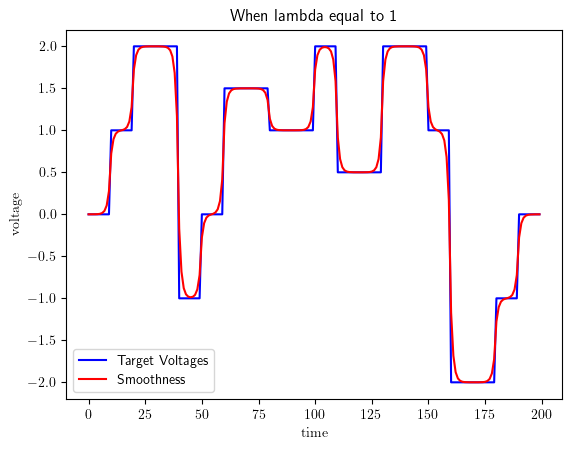

PyObject <matplotlib.legend.Legend object at 0x000001E91B5EE380>

In [3]:
## More Starter code for question 1. You could use this code inside a function called "plotmodel(lambda)", 
## and then call plotmodel with three values of lambda to get the required plots.

PyPlot.svg(false)
# Use Latex for nice-looking axis titles
PyPlot.rc("text", usetex=true)
# Create a figure
figure(figsize=(10, 3))
# Set the limit to axes
axis([0, 200, -2.5, 2.5])

PyPlot.tight_layout()

# set ticks
ax = gca()
mx = matplotlib[:ticker][:MultipleLocator](10) # Define interval of major ticks
ax[:xaxis][:set_major_locator](mx) # Set interval of major ticks

my = matplotlib[:ticker][:MultipleLocator](.5)
ax[:yaxis][:set_major_locator](my)

m = Model(HiGHS.Optimizer)

@variable(m, v[1:200])

R_value, M_value = 0, 0
for i = 1:199
    R_value += (v[i+1]-v[i])^2
end
for i= 1:200
    M_value += (vtarget[i]-v[i])^2
end

λ = 1 
min_value = λ * R_value + M_value
@objective(m, Min, min_value)

close()

optimize!(m)
                
figure()
plot(vtarget, "b-", label="Target Voltages")
plot(value.(v), "r-", label="Smoothness")
xlabel(L"\textrm{time}")
ylabel(L"\textrm{voltage}")
title("When lambda equal to 1")
legend()

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000000, 0.000000, 0, 0.000000, 0.000000
3, 50.146145, 200, 0.009243, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  5.0146129038e+01
HiGHS run time      :          0.01


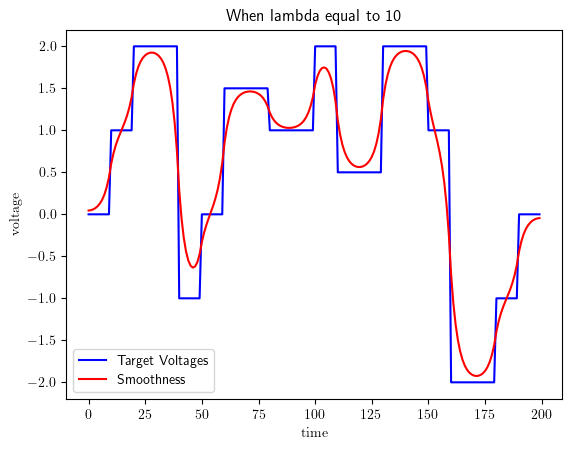

PyObject <matplotlib.legend.Legend object at 0x000001E9337DFE50>

In [4]:
m = Model(HiGHS.Optimizer)

@variable(m, v[1:200])

R_value, M_value = 0, 0
for i = 1:199
    R_value += (v[i+1]-v[i])^2
end
for i= 1:200
    M_value += (vtarget[i]-v[i])^2
end

λ = 10
min_value = λ * R_value + M_value
@objective(m, Min, min_value)

close()

optimize!(m)
                
figure()
plot(vtarget, "b-", label="Target Voltages")
plot(value.(v), "r-", label="Smoothness")
xlabel(L"\textrm{time}")
ylabel(L"\textrm{voltage}")
title("When lambda equal to 10")
legend()

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 390.000000, 200, 0.000985, 0.000000, 0, 0.000000, 0.000000
3, 141.088419, 200, 0.007033, 0.000000, 0, 0.000000, 0.019851
Model   status      : Optimal
QP ASM    iterations: 3
Objective value     :  1.4108840848e+02
HiGHS run time      :          0.01


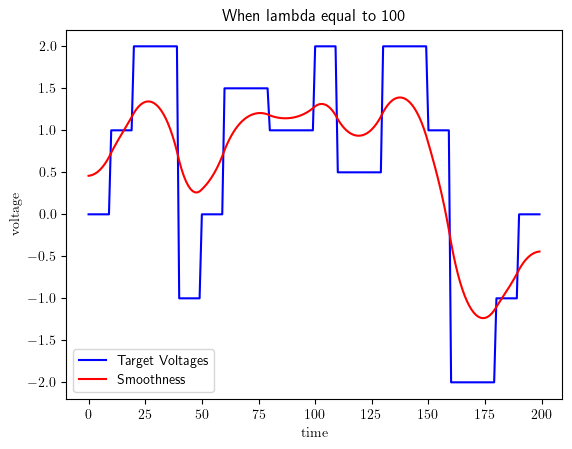

PyObject <matplotlib.legend.Legend object at 0x000001E93900A830>

In [5]:
m = Model(HiGHS.Optimizer)

@variable(m, v[1:200])

R_value, M_value = 0, 0
for i = 1:199
    R_value += (v[i+1]-v[i])^2
end
for i= 1:200
    M_value += (vtarget[i]-v[i])^2
end

λ = 100
min_value = λ * R_value + M_value
@objective(m, Min, min_value)

close()

optimize!(m)
                
figure()
plot(vtarget, "b-", label="Target Voltages")
plot(value.(v), "r-", label="Smoothness")
xlabel(L"\textrm{time}")
ylabel(L"\textrm{voltage}")
title("When lambda equal to 100")
legend()

## Q2 (a)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 39.427944, 2, 0.000000, 0.000000, 0, 0.000000, 0.000000
7, 1.880662, 3, 0.000000, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 7
Objective value     :  1.8806616352e+00
HiGHS run time      :          0.00


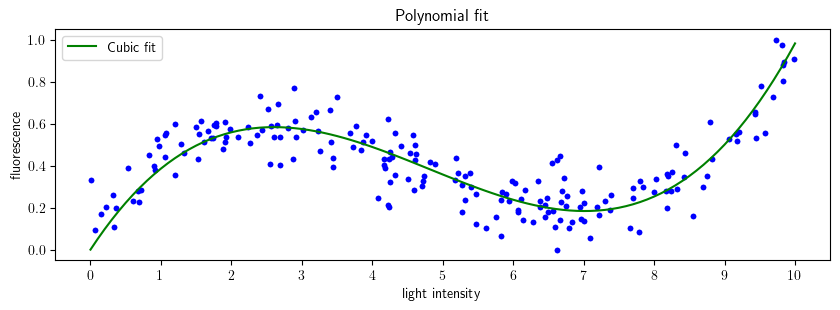

In [8]:
## Starter code for question 2

A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)
    plot(x, y, "b.")
end

# plot the points
plotpoints()

m = Model(HiGHS.Optimizer)

@variable(m, a[1:4])

@constraint(m, a[1] >= 0)
@constraint(m, a[4] == 0)

total = 0
for i = 1:length(x)
    total += (y[i] - a[1]*x[i]^3 - a[2]*x[i]^2 - a[3]*x[i] - a[4])^2
end
@objective(m, Min, total)

optimize!(m)

plot(x, y, "b.")

a_value = value.(a)
x_value = 0:0.1:10
y_value = a_value[1] * x_value.^3 + a_value[2] * x_value.^2 + a_value[3] * x_value
plot(x_value, y_value, "g-", label="Cubic fit")
title("Polynomial fit")
legend()
show()

## Q2 (b)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 394.279440, 3, 0.000000, 0.000000, 0, 0.000000, 0.000000
7, 20.584151, 3, 0.000000, 0.000000, 0, 0.000000, 1.000000
Model   status      : Optimal
QP ASM    iterations: 7
Objective value     :  2.0584151094e+01
HiGHS run time      :          0.00


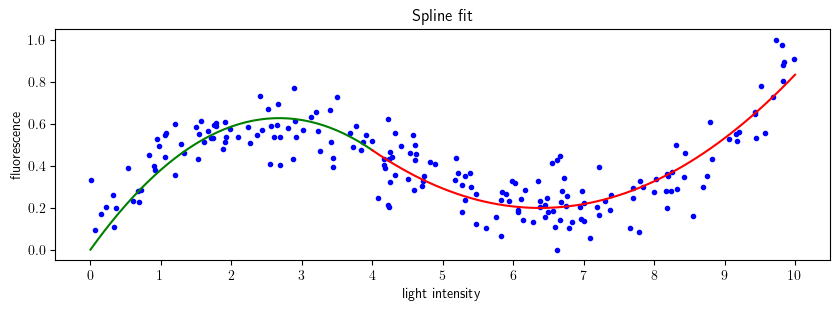

PyObject Text(0.5, 1.0, 'Spline fit')

In [7]:
A = CSV.read(joinpath(@__DIR__, "xy_data.csv"), DataFrame, header=false)
x = A[:,1]
y = A[:,2]

function plotpoints()
    figure(figsize=(10,3))
    xlabel("light intensity")
    ylabel("fluorescence")
    # set the x axis to have ticks 0-10
    xticks(0:10)

    plot(x, y, "b.")
end

first_half = A[1:76, 1] # first half which < 4
latter_half = A[77:200, 1] # latter half which > 4

A1 = zeros(length(first_half), 3)
for i = 1:length(first_half)
    A1[i, 1] = first_half[i]^2
    A1[i, 2] = first_half[i]
    A1[i, 3] = 1
end

A2 = zeros(length(latter_half), 3)
for i = 1:length(latter_half)
    A2[i, 1] = latter_half[i]^2
    A2[i, 2] = latter_half[i]
    A2[i, 3] = 1
end

m = Model(HiGHS.Optimizer)

@variable(m, p[1:3])
@variable(m, q[1:3])

@constraint(m, p[3] == 0)
@constraint(m, 16*p[1] + 4*p[2] + p[3] == 16*q[1] + 4*q[2] + q[3])
@constraint(m, 8*p[1] + p[2] == 8*q[1] + q[2] )

expr = 0
for i in 1:10
    expr += sum((A[1:76, 2] - A1*p).^2) + sum((A[77:200, 2] - A2*q).^2)
end
@objective(m, Min, expr)

optimize!(m)

w = value.(p)
v = value.(q)

function new_plot()
    figure(figsize=(10,3))
    plot(x, y, "b.")

    xticks(0:1:10)
    xlabel("light intensity")

    yticks(0.0:0.2:1.0)
    ylabel("fluorescence")

    xvals = 0:0.1:4
    yvals = w[1] * xvals.^2 .+ w[2] * xvals .+ w[3]
    plot(xvals, yvals, "g-", label="Cubic fit")

    new_xvals = 4:0.1:10
    new_yvals = v[1] * new_xvals.^2 .+ v[2] * new_xvals .+ v[3]
    
    plot(new_xvals, new_yvals, "r-", label="Piecewise quadratic fit")
    title("Spline fit")
end

new_plot()

## Q3 (a)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 6810500.508055, 238, 0.003000, 0.000000, 1, 0.000000, 0.000000
483, 105.935392, 238, 0.046035, 0.000000, 1, 0.000000, 0.024542
Model   status      : Optimal
QP ASM    iterations: 483
Objective value     :  1.0593070491e+02
HiGHS run time      :          0.05


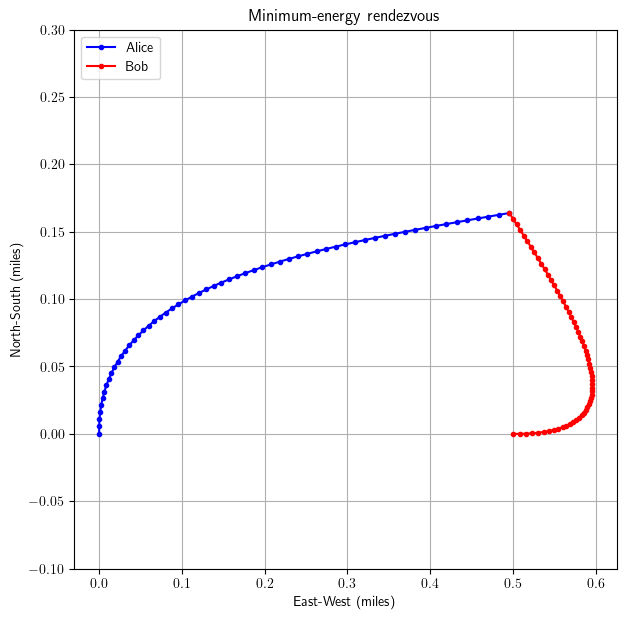

In [9]:
# some dummy code that can be modified to make the plots in Q3. 
# Of course, you will have to change the data ax and bx to be output from the optimization models.

using PyPlot
# answer (regression)
m = Model(HiGHS.Optimizer)

@variable(m, rp_Alice[1:2,1:60]) # resulting position
@variable(m, rp_Bob[1:2,1:60])

@variable(m, rv_Alice[1:2,1:60]) # resulting velocity
@variable(m, rv_Bob[1:2,1:60])

@variable(m, ti_Alice[1:2,1:60]) # thruster input
@variable(m, ti_Bob[1:2,1:60])

# satisfy the dynamics
@constraint(m, rp_Alice[:,2:end] .== rp_Alice[:,1:end-1] + 1/3600 .* rv_Alice[:,1:end-1]) # formula
@constraint(m, rv_Alice[:,2:end] .== rv_Alice[:,1:end-1] + ti_Alice[:,1:end-1])

@constraint(m, rp_Bob[:,2:end] .== rp_Bob[:,1:end-1] + 1/3600 .* rv_Bob[:,1:end-1])
@constraint(m, rv_Bob[:,2:end] .== rv_Bob[:,1:end-1] + ti_Bob[:,1:end-1])

@constraint(m, rp_Alice[:,1] .== [0;0])
@constraint(m, rv_Alice[:,1] .== [0;20]) # Alice has a speed of 20 mph going North

@constraint(m, rp_Bob[:,1] .== [0.5;0])
@constraint(m, rv_Bob[:,1] .== [30;0]) # Bob is located half a mile East of Alice, moving due East at 30 mph

@constraint(m, rp_Alice[:,60] .== rp_Bob[:,60]) # Alice and Bob would like to rendezvous at exactly t = 60 seconds

total_energy = sum(ti_Alice.^2) + sum(ti_Bob.^2)
@objective(m, Min, total_energy)

optimize!(m)

w = value.(rp_Alice)
v = value.(rp_Bob)

figure(figsize=(7, 7))
plot(w[1,:], w[2,:], "b.-", label="Alice")
plot(v[1,:], v[2,:], "r.-", label="Bob")

xlabel("East-West (miles)")
xticks(0.0:0.1:0.6)

ylabel("North-South (miles)")
yticks(-0.1:0.05:0.3)

legend(loc = "upper left")
grid()
title("Minimum-energy rendezvous");

## Q3 (b)

Running HiGHS 1.4.2 [date: 1970-01-01, git hash: f797c1ab6]
Copyright (c) 2022 ERGO-Code under MIT licence terms
0, 6810500.508055, 234, 0.002504, 0.000000, 1, 0.000000, 0.000000
435, 245.590267, 234, 0.041373, 0.000000, 1, 0.000000, 0.024950
Model   status      : Optimal
QP ASM    iterations: 435
Objective value     :  2.4558737581e+02
HiGHS run time      :          0.04


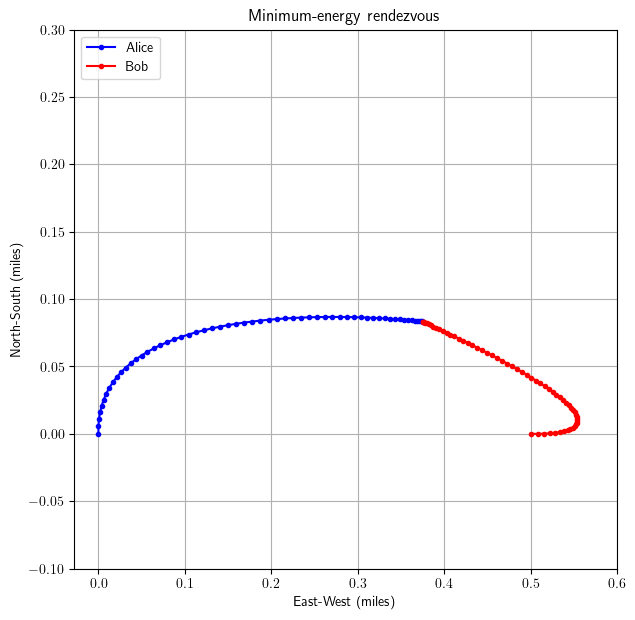

PyObject Text(0.5, 1.0, 'Minimum-energy rendezvous')

In [11]:
m = Model(HiGHS.Optimizer)

@variable(m, rp_Alice[1:2,1:60]) # resulting position
@variable(m, rp_Bob[1:2,1:60])

@variable(m, rv_Alice[1:2,1:60]) # resulting velocity
@variable(m, rv_Bob[1:2,1:60])

@variable(m, ti_Alice[1:2,1:60]) # thruster input
@variable(m, ti_Bob[1:2,1:60])

# satisfy the dynamics
@constraint(m, rp_Alice[:,2:end] .== rp_Alice[:,1:end-1] + 1/3600 .* rv_Alice[:,1:end-1]) # formula
@constraint(m, rv_Alice[:,2:end] .== rv_Alice[:,1:end-1] + ti_Alice[:,1:end-1])

@constraint(m, rp_Bob[:,2:end] .== rp_Bob[:,1:end-1] + 1/3600 .* rv_Bob[:,1:end-1])
@constraint(m, rv_Bob[:,2:end] .== rv_Bob[:,1:end-1] + ti_Bob[:,1:end-1])

@constraint(m, rp_Alice[:,1] .== [0;0])
@constraint(m, rv_Alice[:,1] .== [0;20]) # Alice has a speed of 20 mph going North

@constraint(m, rp_Bob[:,1] .== [0.5;0])
@constraint(m, rv_Bob[:,1] .== [30;0]) # Bob is located half a mile East of Alice, moving due East at 30 mph

@constraint(m, rp_Alice[:,60] .== rp_Bob[:,60]) # Alice and Bob would like to rendezvous at exactly t = 60 seconds

@constraint(m, rv_Alice[:,60] .== [0;0]) # their velocities are both zero when they rendezvous
@constraint(m, rv_Bob[:,60] .== [0,0])

total_energy = sum(ti_Alice.^2) + sum(ti_Bob.^2)
@objective(m, Min, total_energy)

optimize!(m)

w = value.(rp_Alice)
v = value.(rp_Bob)

figure(figsize=(7, 7))
plot(w[1,:], w[2,:], "b.-", label="Alice")
plot(v[1,:], v[2,:], "r.-", label="Bob")

xlabel("East-West (miles)")
xticks(0.0:0.1:0.6)

ylabel("North-South (miles)")
yticks(-0.1:0.05:0.3)

legend(loc = "upper left")
grid()
title("Minimum-energy rendezvous")